In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "nuttx"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Job executions per month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby(actions.month).agg({"jobhours":["sum","mean", "max", "count"]})

jobhours                           
                  sum      mean        max count
month                                           
2021-02   6350.025556  3.618248  16.076389  1755
2021-03  14138.818889  3.441777  17.845833  4108

## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                                  sum      mean        max
repo                                                      
incubator-nuttx          12719.934722  3.316802  17.845833
incubator-nuttx-apps      1391.366389  5.477820  15.686389
incubator-nuttx-testing     26.574722  4.429120  13.693333
incubator-nuttx-website      0.943056  0.072543   0.086944

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                      
                                             sum       mean        max
repo                    workflowid                                    
incubator-nuttx         908549      12449.265833  11.890416  17.845833
incubator-nuttx-apps    908566       1386.528889  12.604808  15.686389
incubator-nuttx         4260298       143.443333   0.177091   0.684722
                        904372        120.568611   0.110817   6.003611
incubator-nuttx-testing 908116         26.466389   8.822130  13.693333
incubator-nuttx         904371          6.509722   0.008400   0.040278
incubator-nuttx-apps    4585365         4.161944   0.057805   0.074444
incubator-nuttx-website 983737          0.943056   0.072543   0.086944
incubator-nuttx-apps    904465          0.675556   0.009383   0.015833
incubator-nuttx         7327318         0.147222   0.001280   0.002778
incubator-nuttx-testing 4592613         0.108333   0.036111   0.038611

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
695501,apache,incubator-nuttx,652672218,6832,2021-03-15 01:52:23+00:00,2021-03-15 07:54:29+00:00,completed,failure,908549,2021-03-15 01:52:34+00:00,2021-03-15 07:54:19+00:00,True,19,64245,nuttx,17.845833,2021-03
695988,apache,incubator-nuttx,689691482,7270,2021-03-26 10:48:00+00:00,2021-03-26 17:18:23+00:00,completed,failure,908549,2021-03-26 10:50:39+00:00,2021-03-26 17:18:13+00:00,True,19,59480,nuttx,16.522222,2021-03
696026,apache,incubator-nuttx,692200740,7304,2021-03-27 06:04:31+00:00,2021-03-27 12:07:00+00:00,completed,failure,908549,2021-03-27 06:04:40+00:00,2021-03-27 12:06:49+00:00,True,19,58066,nuttx,16.129444,2021-03
694771,apache,incubator-nuttx,569162969,6175,2021-02-15 16:48:09+00:00,2021-02-15 19:54:01+00:00,completed,success,908549,2021-02-15 16:48:21+00:00,2021-02-15 19:53:50+00:00,True,19,57875,nuttx,16.076389,2021-02
694769,apache,incubator-nuttx,568950429,6173,2021-02-15 15:24:20+00:00,2021-02-15 18:35:15+00:00,completed,success,908549,2021-02-15 15:24:32+00:00,2021-02-15 18:35:05+00:00,True,19,57571,nuttx,15.991944,2021-02
695705,apache,incubator-nuttx,669194414,7015,2021-03-19 20:42:08+00:00,2021-03-20 07:35:25+00:00,completed,success,908549,2021-03-20 01:09:06+00:00,2021-03-20 07:32:41+00:00,True,19,56654,nuttx,15.737222,2021-03
698779,apache,incubator-nuttx-apps,673490264,1232,2021-03-21 16:10:56+00:00,2021-03-21 20:33:03+00:00,completed,success,908566,2021-03-21 16:11:05+00:00,2021-03-21 20:27:52+00:00,True,19,56471,nuttx,15.686389,2021-03
694986,apache,incubator-nuttx,596154082,6369,2021-02-24 13:21:41+00:00,2021-02-24 18:20:34+00:00,completed,success,908549,2021-02-24 14:06:56+00:00,2021-02-24 18:20:23+00:00,True,19,54168,nuttx,15.046667,2021-02
694561,apache,incubator-nuttx,528754008,5987,2021-02-01 19:58:14+00:00,2021-02-01 23:19:47+00:00,completed,success,908549,2021-02-01 20:00:17+00:00,2021-02-01 23:19:37+00:00,True,19,53759,nuttx,14.933056,2021-02
694864,apache,incubator-nuttx,582404589,6259,2021-02-19 19:09:20+00:00,2021-02-19 21:51:28+00:00,completed,success,908549,2021-02-19 19:09:31+00:00,2021-02-19 21:47:15+00:00,True,19,53596,nuttx,14.887778,2021-02


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
29,apache,incubator-nuttx,macOS (other),2813.376944
30,apache,incubator-nuttx,macOS (sim),2020.759167
27,apache,incubator-nuttx,macOS (arm-12),1894.218611
17,apache,incubator-nuttx,Linux (other),1346.498056
5,apache,incubator-nuttx,Linux (arm-02),1233.075278
8,apache,incubator-nuttx,Linux (arm-05),1156.246389
7,apache,incubator-nuttx,Linux (arm-04),1058.868889
9,apache,incubator-nuttx,Linux (arm-06),1006.108611
11,apache,incubator-nuttx,Linux (arm-08),980.784444
10,apache,incubator-nuttx,Linux (arm-07),955.821667


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
4,apache,incubator-nuttx,success,39351
0,apache,incubator-nuttx,cancelled,5470
8,apache,incubator-nuttx-apps,success,4622
1,apache,incubator-nuttx,failure,1007
5,apache,incubator-nuttx-apps,cancelled,634
11,apache,incubator-nuttx-testing,success,351
9,apache,incubator-nuttx-testing,cancelled,218
3,apache,incubator-nuttx,skipped,162
6,apache,incubator-nuttx-apps,failure,75
2,apache,incubator-nuttx,neutral,63


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

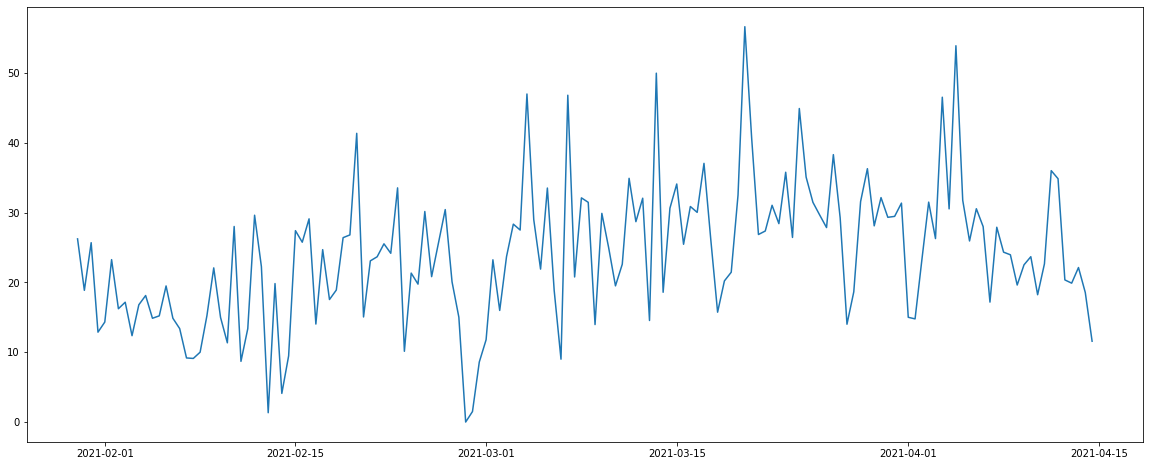

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

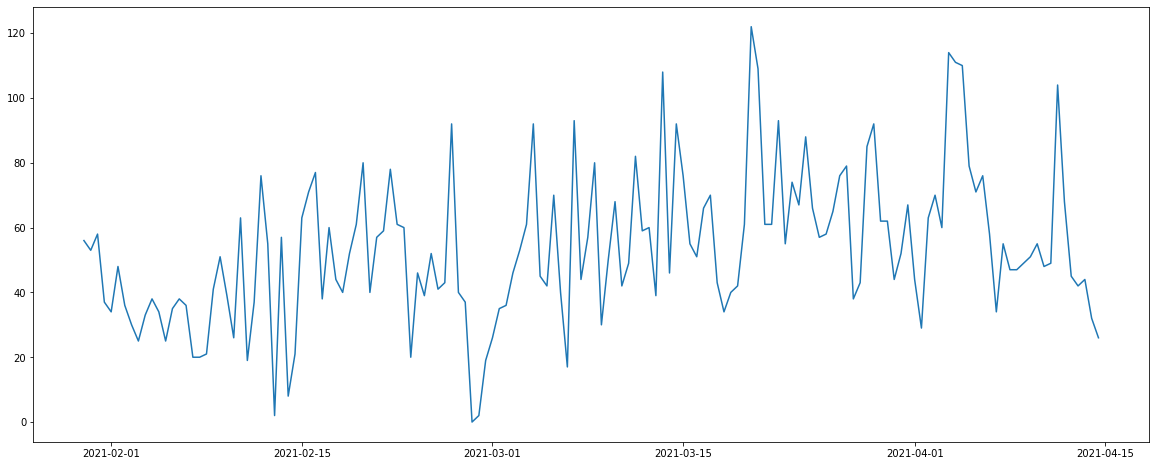

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()